In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Two-Sample T-Test

In [2]:
#Measured in Seconds
miles_2018 = [470, 444, 476, 511, 441, 441, 513, 481, 431, 472]
miles_2019 = [420, 394, 426, 461, 395, 395, 463, 431, 381, 422]

In [3]:
#Difference in Means
np.mean(miles_2019) - np.mean(miles_2018)

-49.19999999999999

In [4]:
#Get Pooled Variance
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))
pooled_var = custom_pooled_variance(miles_2018, miles_2019)
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 162.82
Pooled Standard Deviation: 12.76


In [5]:
#Get Degrees of Freedom
df = len(miles_2018) + len(miles_2019) - 2
print(df)

18


In [6]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=18)

Note that our observed value is at close to the 0-th percentile of the distribution.

In [7]:
dist.cdf(-49.19999999999999)

0.0005790271288511914

## Two-Sided Test

If we wanted to find whether our 2019 mile times were *different* than our 2018 mile times, we'd do a two-sided test.

For a two-sided test at a significance level of 0.05, we'll reject anything before the 2.5th percentile and anything after the 97.5th percentile.

In [8]:
dist.ppf(0.025)

-26.807779868942898

In [9]:
dist.ppf(0.975)

26.807779868942898

Rejection Region: Less than -26.81
Rejection Region: Less than 26.81


Text(0.5, 0.92, 'T-Distribution of Difference Between Samples')

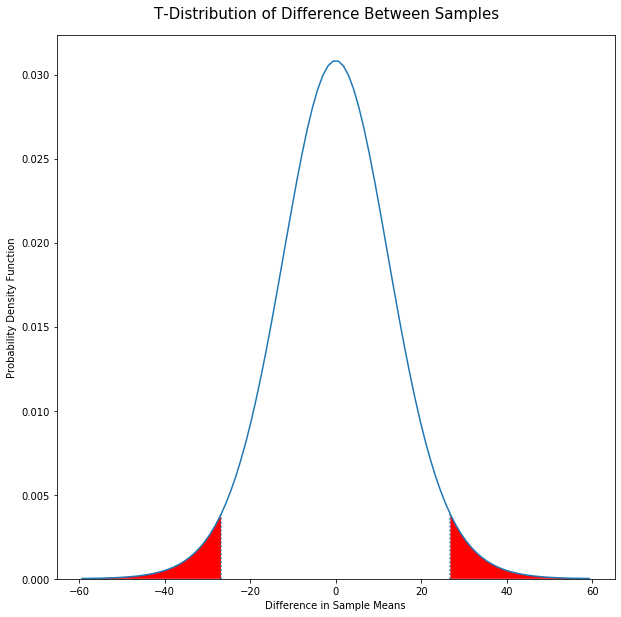

In [10]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=18)
print('Rejection Region: Less than', np.round(dist.ppf(0.025), 2))
print('Rejection Region: Less than', np.round(dist.ppf(0.975), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

Here, we'll find the p-value by multiplying the CDF of our observed value by 2, since this is a two-tailed test. Note that if our observed value had a percentile of greater than the 50th percentile of the distribution (in this case 0), we'd find the p-value of the *inverse CDF* rather than the CDF.

In [11]:
#P-Value
stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).cdf(-49.19999999999999) * 2

0.0011580542577023828

## One-Sided Test

If we wanted to find whether our 2019 mile times were *less* than our 2018 mile times, we'd do a one-sided test.

For a one-sided test at a significance level of 0.05, we'll reject anything before the 5th percentile.

In [12]:
stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).ppf(0.05)

-22.126663700294397

Rejection Region: Less than -22.13


Text(0.5, 0.92, 'T-Distribution of Difference Between Samples')

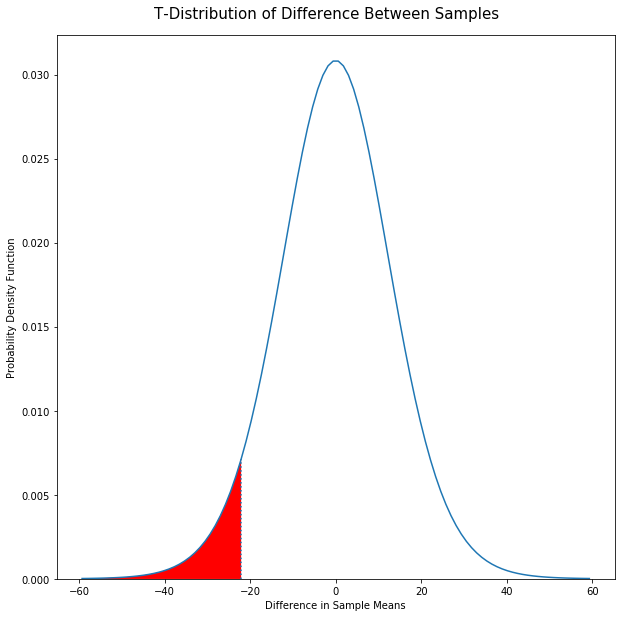

In [13]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=18)
print('Rejection Region: Less than', np.round(dist.ppf(0.05), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.05), dist.ppf(0.05)],[0, dist.pdf(dist.ppf(0.05))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.05))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

Here, we'll find the p-value by taking CDF of our observed value, since this is a one-sided test. Note that if our observed value had a percentile of greater than the 50th percentile of the distribution (in this case 0), we'd find the p-value of the *inverse CDF* rather than the CDF.

In [14]:
#P-Value
stats.t(loc=0, scale=np.sqrt(pooled_var), df=18).cdf(-49.19999999999999)

0.0005790271288511914

# ANOVA Test

In [15]:
#Measured in Seconds
miles_2017 = [458, 447, 462, 470, 428, 426, 445, 423, 454, 446]
miles_2018 = [470, 444, 476, 511, 441, 441, 513, 481, 431, 472]
miles_2019 = [420, 394, 426, 461, 395, 395, 463, 431, 381, 422]

# ANOVA Test

* Our null hypothesis is that my mean running times in 2017, 2018, 2019 were all the same.
* Our alternate hypothesis is that my mean running times in 2017, 2018, and 2019 were *not* all the same.
* This will be a **one-sided test**, using the **F-distribution** rather than the **T distribution**.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2289d358>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2289da58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a22891ef0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a2289de80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a228a7470>,
 'means': []}

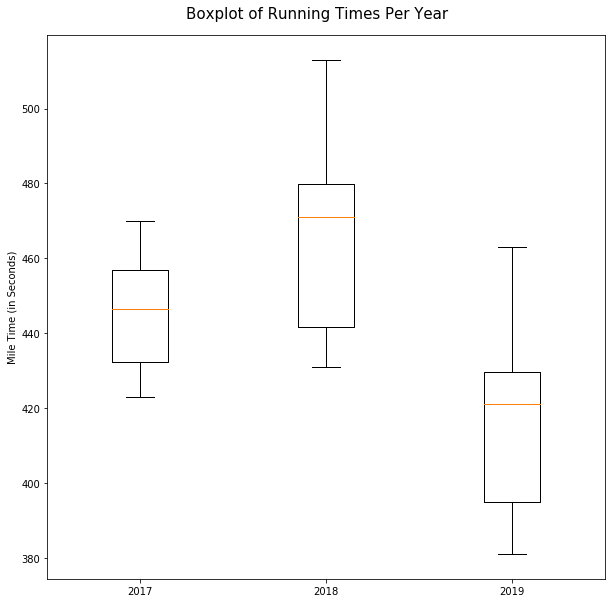

In [16]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('Mile Time (in Seconds)')
fig.suptitle('Boxplot of Running Times Per Year', fontsize=15, y=0.92)
plt.boxplot([miles_2017, miles_2018, miles_2019], labels=['2017', '2018', '2019'])

Rejection Region: Greater than 3.35


Text(0.5, 0.92, 'F-Distribution of Difference Between Samples')

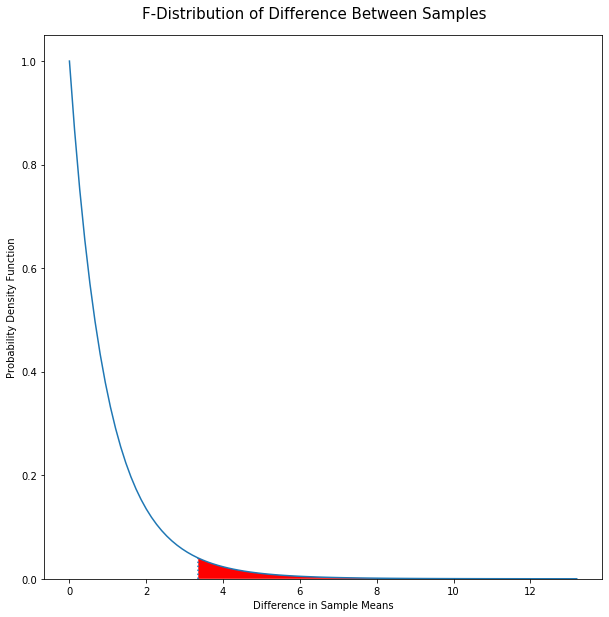

In [17]:
dist = stats.f(dfn=2, dfd = 27)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('F-Distribution of Difference Between Samples', fontsize=15, y=0.92)

In [18]:
F, p = stats.f_oneway(miles_2017, miles_2018, miles_2019)
print('F-statistic:', np.round(F, 2))
print('p-value:', np.round(p, 2))

F-statistic: 9.67
p-value: 0.0


You can use the above formula to easily find the p-value for an ANOVA test above, or manually find the p-value below. Note that dfn is the number of distributions you're comparing minus 1 (in this case 3 - 1) and dfd is the number of total samples minus the number of distributions (in this case 30 - 3).

In [19]:
#Manual P-Value
1 - stats.f(dfn=2, dfd = 27).cdf(9.673758739711474)

0.000679287116705507

Note that an ANOVA test will **always be a one-sided test**.

# Bootstrap Test

In [20]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = miles_2018 + miles_2019
    np.random.shuffle(total)
    new_a = total[:len(miles_2018)]
    new_b = total[len(miles_2018):]
    diff.append(np.mean(new_b) - np.mean(new_a))

Text(0.5, 0.92, 'Bootstrap Distribution of Difference Between Samples')

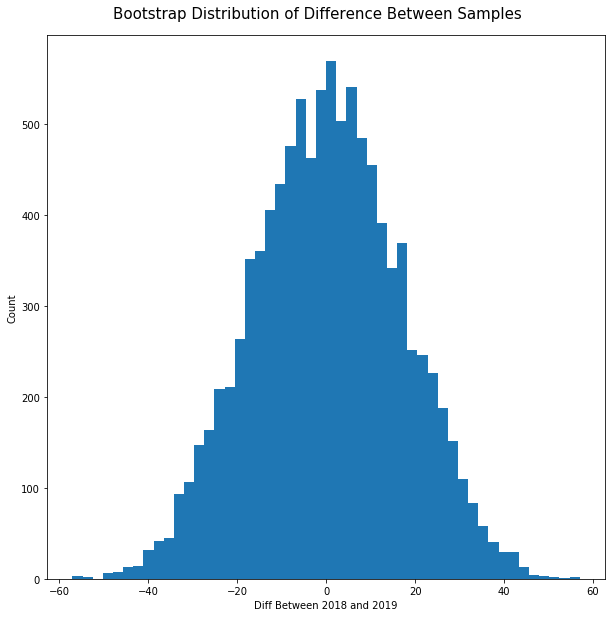

In [21]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between 2018 and 2019')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)

## Two-Sided Test

If we wanted to find whether our 2019 mile times were *different* than our 2018 mile times, we'd do a two-sided test.

For a two-sided test at a significance level of 0.05, we'll reject anything before the 2.5th percentile and anything after the 97.5th percentile.

In [22]:
#2.5th Percentile
np.percentile(diff, 2.5)

-32.0

In [23]:
#97.5th Percentile
np.percentile(diff, 97.5)

32.19999999999999

We'll reject our null hypothesis if our value is less than -32 or greater than 32.199

Here, we'll find the p-value by multiplying the CDF of our observed value by 2, since this is a two-tailed test. Note that if our observed value had a percentile of greater than the 50th percentile of the distribution (in this case 0), we'd find the p-value of the inverse CDF rather than the CDF.

In [24]:
stats.percentileofscore(diff, -49.2) * 2

0.12

Note that the above shows us that our value has a p-value of 0.0012, rather than 0.12! With this, we can reject the null hypothesis.

## One-Sided Test

If we wanted to find whether our 2019 mile times were *less* than our 2018 mile times, we'd do a one-sided test.

For a one-sided test at a significance level of 0.05, we'll reject anything before the 5th percentile.

In [25]:
#5th Percentile
np.percentile(diff, 5)

-27.400000000000034

We'll reject our null hypothesis if our value is less than -27.4

Here, we'll find the p-value by taking CDF of our observed value, since this is a one-sided test. Note that if our observed value had a percentile of greater than the 50th percentile of the distribution (in this case 0), we'd find the p-value of the inverse CDF rather than the CDF.

In [26]:
stats.percentileofscore(diff, -49.2)

0.06

Note that the above shows us that our value has a p-value of 0.0006, rather than 0.06! With this, we can reject the null hypothesis.

# Chi-Square Test for Goodness of Fit

We use the Chi-Square Test for Goodness of Fit when we want to compare whether an observed discrete distribution can come from an expected discrete distribution.

For this example, we'll get the expected outcomes for 100 dice rolls.

In [27]:
expected_results = []
for i in range(1,7):
    for j in range(1,7):
        total = i + j
        expected_results.append(total)
expected_values, expected_counts = np.unique(expected_results, return_counts=True)
expected_counts_100 = 100 * (expected_counts/np.sum(expected_counts))
print('Expected Results of One-Hundred Dice Rolls')
np.transpose((expected_values, expected_counts_100))

Expected Results of One-Hundred Dice Rolls


array([[ 2.        ,  2.77777778],
       [ 3.        ,  5.55555556],
       [ 4.        ,  8.33333333],
       [ 5.        , 11.11111111],
       [ 6.        , 13.88888889],
       [ 7.        , 16.66666667],
       [ 8.        , 13.88888889],
       [ 9.        , 11.11111111],
       [10.        ,  8.33333333],
       [11.        ,  5.55555556],
       [12.        ,  2.77777778]])

And then we'll get observed outcomes for 100 (random) dice rolls.

In [28]:
np.random.seed(42)
observed_results = np.random.randint(2,13, size=100)
observed_values, observed_counts = np.unique(observed_results, return_counts=True)
np.transpose((observed_values, observed_counts))

array([[ 2,  7],
       [ 3, 10],
       [ 4,  9],
       [ 5,  9],
       [ 6, 10],
       [ 7,  6],
       [ 8,  9],
       [ 9, 14],
       [10, 10],
       [11,  9],
       [12,  7]])

Do our observations come from the expected distribution? We can build a Chi-Square distribution with **10 degrees of freedom**, since our distributions have 11 discrete outcomes.

Rejection Region: Greater than 18.31


Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

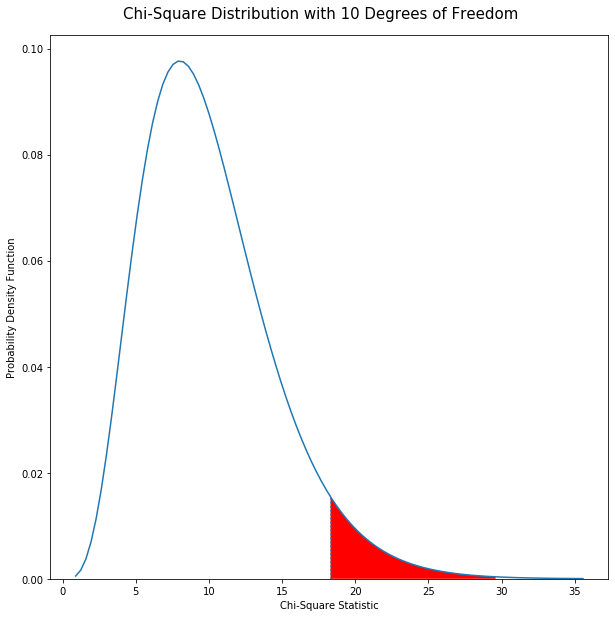

In [29]:
dist = stats.chi2(df=10)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

In [30]:
stats.chisquare(observed_counts, expected_counts_100)

Power_divergenceResult(statistic=29.702, pvalue=0.0009582277855238355)

In [31]:
#Rejection Region for a Chi-Square distribution with 10 degrees of freedom
stats.chi2(df=10).ppf(0.95)

18.307038053275146

We'll reject our null hypothesis if our Chi-square statistic is greater than 18.3

In [32]:
#P-Value
1 - stats.chi2(df=10).cdf(29.702)

0.0009582277855237908

The p-value for our Chi-square statistic is very close to 0, meaning we can reject the null hypothesis at a significance level of 0.05. Note that a Chi-square test will **always be a one-sided test**.

# Chi-Square Test for Homogeneity

We use the Chi-Square Test for Homogeneity when we want to test multiple independent different data sets to see if they are drawn from the same discrete distribution.

|   |Vaccinated   |Not Vaccinated   |
|---|---|---|
|Post-Graduate Degree   |  26,188 |  5,856 |
| College Degree  |  6,776 |  14,599 |
|  < College Degree |  335,998 |  76,193 |

Do our two different data sets come from the same distribution? We can build a Chi-Square distribution with 2 degrees of freedom, since our of each distribution has three outcomes and there are two distributions - so we have (3 - 1) * (2 - 1), or 2 * 1 = 2 degrees of freedom.

Rejection Region: Greater than 5.99


Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

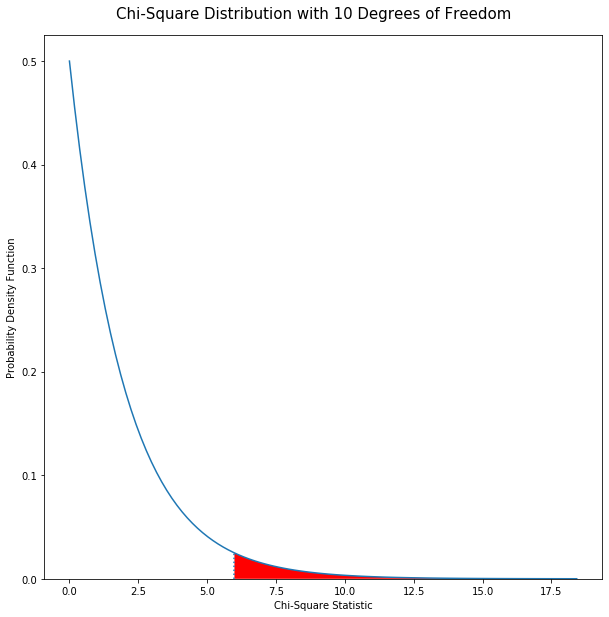

In [33]:
dist = stats.chi2(df=2)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

In [34]:
stats.chi2(df=2).ppf(0.95)

5.991464547107979

We'll reject our null hypothesis if our Chi-square statistic is greater than 5.99

In [35]:
stats.chi2_contingency([[26118, 67776, 335998], [5856, 14599, 76193]])

(26.656285207184467,
 1.6280255382971824e-06,
 2,
 array([[ 26105.07617275,  67254.82109621, 336532.10273104],
        [  5868.92382725,  15120.17890379,  75658.89726896]]))

In [36]:
#P-Value
1 - stats.chi2(df=2).cdf(26.656)

1.628257717101178e-06

The p-value for our Chi-square statistic is very close to 0, meaning we can reject the null hypothesis at a significance level of 0.05. Note that a Chi-square test will **always be a one-sided test**.